# Respostas para Processo Seletivo - IEEE Computational Intelligence Society, UnB

Sou **Guilherme Braga Pinto**, me formei em Engenharia da Computação na Universidade de Brasília no começo de 2023 (acredito que tudo bem eu participar do processo mesmo já tendo formado, mas qualquer coisa me avisem). Realizei pesquisas na área de Dados Semânticos por meio de PIBIC e do meu TCC, rendendo uma publicação na área.

Sou Engenheiro de Dados faz cerca de 4 anos, atualmente trabalho tempo integral na Unidade de Inteligência Artifical e Analítica do Banco do Brasil desde o final de 2023. Minha stack é primariamente Spark em linguagem Python para ambiente Big Data, mas quando realizava estágio na área eu usava Pandas.

Multidisciplinaridade é extremamente relevante e mesmo como Engenheiro de Dados o processo de entendimento de construção de modelos como um todo é muito importante para a carreira, logo hoje foco meus estudos também em Ciência de Dados e IA. Não dei prosseguimento no meu mestrado na UnB por questão de tempo, mas sigo fazendo pós-graduação e tenho desejo de retornar para UnB eventualmente.

Segue meu [LinkedIn](https://www.linkedin.com/in/gui8600k/).

Github do projeto:

## Escolhi rodar esse desafio usando PySpark.

***Tá, mas por que raios?***

Basicamente o PySpark é uma interface entre um ambiente Spark para manipulação com linguagem Python. Trata-se de uma stack open source e amplamente adotada na indústria para ingestão de dados. É um ambiente que permite personalização por meio de diferentes bibliotecas (desde NLP até Machine Learning e Grafos) e simples interação com ambiente de arquivos distribuídos da própria Apache, o Hadoop.

Mas o Spark brilha ao fazer a gestão transparente de computação distribuída sem você ter que escrever algoritmos baseados em *map reduce* na unha. Acaba que é uma solução muito comum de se ver de instalação em ambiente corporativo para Big Data hoje em dia. Além do mais, dá pra usar SQL como uma forma de manipulação em cima do ambiente Spark, então, **nice**.



---


"*Para armazenar, gerenciar e processar big data, o Apache Hadoop separa os conjuntos de dados em subconjuntos ou partições menores. Em seguida, armazena as partições em uma rede distribuída de servidores. Da mesma forma, o Apache Spark processa e analisa big data em nós distribuídos para fornecer insights de negócios.*"

Logo o PySpark é a interface Python dessa ambiente.



---



O *dataset* dessa tarefa não justifica levar uma lança-mísseis para uma briga de faca, mas acredito ser uma boa pratica dependendo do cliente termos um caminho claro para escalabilidade, logo realizando uma boa gestão em termos de governança de dados em longo prazo. Isso é algo que hoje é interessante dado os volumes massivos de dados sendo gerados.

**Mas em última instância, PySpark é um padrão de indústria para ETL e vai me consumir menos tempo para programar então é isso 🙂.**

## Spark SQL e DataFrame

Spark SQL é um módulo Spark para processamento de dados estruturados. Ele fornece uma abstração de programação chamada DataFrame e também pode atuar como mecanismo de consulta SQL distribuído.

## Spark Streaming

Executando em cima do Spark, o recurso de streaming no Apache Spark possibilita o uso de poderosas aplicações interativas e analíticas em streaming e dados históricos, enquanto herda a facilidade de uso do Spark e as características de tolerância a falhas.

## Spark MLlib
Construído sobre o Spark, MLlib é uma biblioteca de aprendizado de máquina escalonável que fornece um conjunto uniforme de APIs de alto nível que ajudam os usuários a criar e ajustar pipelines de aprendizado de máquina práticos.

## Spark Core
É o mecanismo de execução geral subjacente para a plataforma Spark sobre o qual todas as outras funcionalidades são construídas. Ele fornece um RDD (Resilient Distributed Dataset) e recursos de computação na memória.

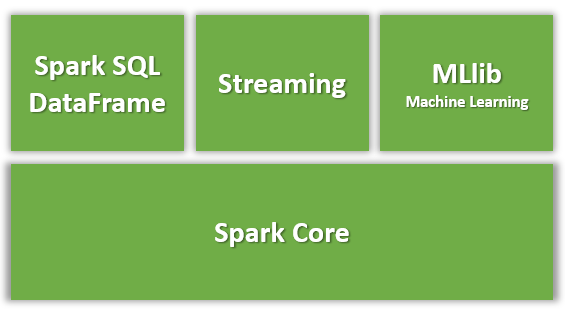

## Instalando dependências e configurando o Spark

Estou rodando este Notebook em Google Colab para simplificar reprodutibilidade e me permitir desenvolver em mais de uma máquina sem ter que me importar com manutenção de dependências. Execute as instalações em sua instância e tenha os mesmos resultados, dado que se trata de um ambiente encapsulado.

In [2]:
# instalar as dependências
!apt-get update -qq
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
!pip install -q findspark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=dbe134cf70ca15911cea5fcfbd25ab6387147e105ede25acd127c5560de1e56c
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [4]:
import findspark
findspark.init()

In [5]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master('local[*]') \
    .appName("IEEE UnB") \
    .config('spark.ui.port', '4050') \
    .getOrCreate()

### Aqui vamos ver se nossa sessão spark está correta

No caso está rodando tudo em memória. Dá para ver a gestão de recursos computacionais/execução de processos usando o NGROK para olhar para a porta 4050 da nossa sessão Spark. Por isso que apertar a "Spark UI" abaixo não leva para lugar algum.

Seriam as instruções a seguir, mas não pretendo usar esse recurso.

```
!wget -q https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

get_ipython().system_raw('./ngrok authtoken DIGITE AQUI O SEU AUTHTOKEN')
get_ipython().system_raw('./ngrok http 4050 &')

!curl -s http://localhost:4050/api/tunnels
```

Mas Spark é massa, tem como não.

In [6]:
spark

## Carregando os dados

No caso tenho esses dados gravados no diretório declarado abaixo, lendo os dados diretamente do meu Google Drive pessoal. Logo para reprodutibilidade é um pré-requisito guardar os dados no Drive e atualizar o *path* caso necessário. No caso isso é uma exemplificação do potencial de uso real do Spark, que se dá bem em ambientes *Big Data*.

Estou lendo esses dados de um csv com separador ",".

In [23]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType
from pyspark.sql import functions as F

In [15]:
# Estou definindo préviamente os esquemas do dataframe para não ter que dar cast depois
# já lerei tudo com os nomes e tipos corretos

schema = StructType([
    StructField('ID', IntegerType(), True),
    StructField('Age', StringType(), True),
    StructField('Gender', StringType(), True),
    StructField('Education', StringType(), True),
    StructField('Country', StringType(), True),
    StructField('Ethnicity', StringType(), True),
    StructField('Income (USD)', FloatType(), True),
    StructField('Nscore', FloatType(), True),
    StructField('Escore', FloatType(), True),
    StructField('Oscore', FloatType(), True),
    StructField('AScore', FloatType(), True),
    StructField('Cscore', FloatType(), True),
    StructField('Impulsive', FloatType(), True),
    StructField('SS', FloatType(), True),
    StructField('Alcohol', StringType(), True),
    StructField('Amphet', StringType(), True),
    StructField('Amyl', StringType(), True),
    StructField('Benzos', StringType(), True),
    StructField('Caff', StringType(), True),
    StructField('Cannabis', StringType(), True),
    StructField('Choc', StringType(), True),
    StructField('Coke', StringType(), True),
    StructField('Crack', StringType(), True),
    StructField('Ecstasy', StringType(), True),
    StructField('Heroin', StringType(), True),
    StructField('Ketamine', StringType(), True),
    StructField('Legalh', StringType(), True),
    StructField('LSD', StringType(), True),
    StructField('Meth', StringType(), True),
    StructField('Mushrooms', StringType(), True),
    StructField('Nicotine', StringType(), True),
    StructField('Semer', StringType(), True),
    StructField('VSA', StringType(), True)
])

In [16]:
path = '/content/drive/MyDrive/IEEE_UnB/Drugs.csv'
drugs_df = spark\
            .read\
            .format("csv")\
            .schema(schema)\
            .option("header", True)\
            .option("delimiter", ",")\
            .load(path)\

drugs_df.count()

1884

In [21]:
# Confirmando que nossa leitura foi correta
drugs_df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Ethnicity: string (nullable = true)
 |-- Income (USD): float (nullable = true)
 |-- Nscore: float (nullable = true)
 |-- Escore: float (nullable = true)
 |-- Oscore: float (nullable = true)
 |-- AScore: float (nullable = true)
 |-- Cscore: float (nullable = true)
 |-- Impulsive: float (nullable = true)
 |-- SS: float (nullable = true)
 |-- Alcohol: string (nullable = true)
 |-- Amphet: string (nullable = true)
 |-- Amyl: string (nullable = true)
 |-- Benzos: string (nullable = true)
 |-- Caff: string (nullable = true)
 |-- Cannabis: string (nullable = true)
 |-- Choc: string (nullable = true)
 |-- Coke: string (nullable = true)
 |-- Crack: string (nullable = true)
 |-- Ecstasy: string (nullable = true)
 |-- Heroin: string (nullable = true)
 |-- Ketamine: string (nullable = true)
 |-- Legalh:

In [49]:
drugs_df.show(10, truncate=False)

+---+-----+------+---------------------------------+-------+---------+------------+--------+--------+--------+--------+--------+---------+--------+-------+------+----+------+----+--------+----+----+-----+-------+------+--------+------+---+----+---------+--------+-----+---+
|ID |Age  |Gender|Education                        |Country|Ethnicity|Income (USD)|Nscore  |Escore  |Oscore  |AScore  |Cscore  |Impulsive|SS      |Alcohol|Amphet|Amyl|Benzos|Caff|Cannabis|Choc|Coke|Crack|Ecstasy|Heroin|Ketamine|Legalh|LSD|Meth|Mushrooms|Nicotine|Semer|VSA|
+---+-----+------+---------------------------------+-------+---------+------------+--------+--------+--------+--------+--------+---------+--------+-------+------+----+------+----+--------+----+----+-----+-------+------+--------+------+---+----+---------+--------+-----+---+
|2  |25-34|M     |Doctorate degree                 |UK     |White    |0.0         |-0.67825|1.93886 |1.43533 |0.76096 |-0.14277|-0.71126 |-0.21575|CL5    |CL2   |CL2 |CL0   |CL6 

## Limpeza dos dados
No caso deve-se executar os passos mais simples e básicos, até porque não é desejável alterar a natureza do dado.

Esses passos são:



* Confirmar que todos os registros do dataframe possuem atributo identificador preenchido
* Caso um dos scores esteja pendente, substituir por zero
* Campos de strings descritivas, caso pedente, adicionar categoria "desconhecido"
* Income, onde Null, passa a zerar.
* Para todas as drogas, caso Null, adicionar categoria "CL0". Ou seja, vou assumir que quem não declarou o uso da droga nunca teve contato mesmo.




In [24]:
# quantos nulos em cada coluna?
drugs_df.select([F.count(F.when(F.isnull(c), 1)).alias(c) for c in drugs_df.columns]).show()

+---+---+------+---------+-------+---------+------------+------+------+------+------+------+---------+---+-------+------+----+------+----+--------+----+----+-----+-------+------+--------+------+---+----+---------+--------+-----+---+
| ID|Age|Gender|Education|Country|Ethnicity|Income (USD)|Nscore|Escore|Oscore|AScore|Cscore|Impulsive| SS|Alcohol|Amphet|Amyl|Benzos|Caff|Cannabis|Choc|Coke|Crack|Ecstasy|Heroin|Ketamine|Legalh|LSD|Meth|Mushrooms|Nicotine|Semer|VSA|
+---+---+------+---------+-------+---------+------------+------+------+------+------+------+---------+---+-------+------+----+------+----+--------+----+----+-----+-------+------+--------+------+---+----+---------+--------+-----+---+
|  0|  0|     4|        3|      1|        2|        1861|     4|     3|     3|     4|     5|        4|  7|      3|     2|   2|     2|   4|       1|   2|   1|    1|      0|     0|       0|     0|  0|   0|        0|       0|    0|  0|
+---+---+------+---------+-------+---------+------------+------+----

In [26]:
# Vou botar "Unknown" onde é nulo para "Gender", "Education", "Country" e "Ethnicity"
drugs_df = drugs_df.fillna(value="Unknown", subset=["Gender", "Education", "Country", "Ethnicity"])

# onde está nulo para histórico de drogas, assumo que a pessoa nunca usou a droga mesmo
drugs_df = drugs_df.fillna(value="CL0", subset=["Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc",
                                                "Coke", "Crack"])

# nulos numéricos eu vou botar zero mesmo
drugs_df = drugs_df.fillna(value=0, subset=["Income (USD)", "Nscore", "Escore", "Oscore", "AScore", "Cscore", "Impulsive", "SS"])


In [42]:
# e os dados categóricos para uso de drogas, será que só tem os dados das categorias previstas?

Alcohol_vals = drugs_df.select('Alcohol').distinct().toPandas()['Alcohol'].to_list()
Amphet_vals = drugs_df.select('Amphet').distinct().toPandas()['Amphet'].to_list()
Amyl_vals = drugs_df.select('Amyl').distinct().toPandas()['Amyl'].to_list()
Benzos_vals = drugs_df.select('Benzos').distinct().toPandas()['Benzos'].to_list()
Caff_vals = drugs_df.select('Caff').distinct().toPandas()['Caff'].to_list()
Cannabis_vals = drugs_df.select('Cannabis').distinct().toPandas()['Cannabis'].to_list()
Choc_vals = drugs_df.select('Choc').distinct().toPandas()['Choc'].to_list()
Coke_vals = drugs_df.select('Coke').distinct().toPandas()['Coke'].to_list()
Crack_vals = drugs_df.select('Crack').distinct().toPandas()['Crack'].to_list()
Ecstasy_vals = drugs_df.select('Ecstasy').distinct().toPandas()['Ecstasy'].to_list()
Heroin_vals = drugs_df.select('Heroin').distinct().toPandas()['Heroin'].to_list()
Ketamine_vals = drugs_df.select('Ketamine').distinct().toPandas()['Ketamine'].to_list()
Legalh_vals = drugs_df.select('Legalh').distinct().toPandas()['Legalh'].to_list()
LSD_vals = drugs_df.select('LSD').distinct().toPandas()['LSD'].to_list()
Meth_vals = drugs_df.select('Meth').distinct().toPandas()['Meth'].to_list()
Mushrooms_vals = drugs_df.select('Mushrooms').distinct().toPandas()['Mushrooms'].to_list()
Nicotine_vals = drugs_df.select('Nicotine').distinct().toPandas()['Nicotine'].to_list()
Semer_vals = drugs_df.select('Semer').distinct().toPandas()['Semer'].to_list()
VSA_vals = drugs_df.select('VSA').distinct().toPandas()['VSA'].to_list()

## Valores para contato prévio com as drogas

- CL0 Nunca Usou
- CL1 Usou Mais de Uma Década Atrás
- CL2 Usou nos Últimos Dez Anos
- CL3 Usou no Último Ano (59 vezes)
- CL4 Usou nos Últimos Meses
- CL5 Usou na Última Semana
- CL6 Usou Hoje

De [acordo](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://assets.publishing.service.gov.uk/media/5a7c3217ed915d7d70d1d359/frequent-drug-use-tabs-1213.ods&ved=2ahUKEwiyzvzEg_2GAxWMrpUCHZFECgAQFnoECBAQAw&usg=AOvVaw3iS9ZJ5DlCwcU0Umra6Xqe) com o Governo do Reino Unido, abuso de substância é caracterizada pelo uso mais de uma vez no mês no último ano. No caso para caracterização, vou considerar abuso de substância as categorias CL4, CL5 e CL6.

In [46]:
# Se todas as listas dos distintos valores das categorias são iguais, então tá tudo correto
assert len(Alcohol_vals) == len(Amphet_vals), "Erro!"
assert len(Amphet_vals) == len(Amyl_vals), "Erro!"
assert len(Amyl_vals) == len(Benzos_vals), "Erro!"
assert len(Benzos_vals) == len(Caff_vals), "Erro!"
assert len(Caff_vals) == len(Cannabis_vals), "Erro!"
assert len(Cannabis_vals) == len(Choc_vals), "Erro!"
assert len(Choc_vals) == len(Coke_vals), "Erro!"
assert len(Coke_vals) == len(Crack_vals), "Erro!"
assert len(Crack_vals) == len(Ecstasy_vals), "Erro!"
assert len(Ecstasy_vals) == len(Heroin_vals), "Erro!"
assert len(Heroin_vals) == len(Ketamine_vals), "Erro!"
assert len(Ketamine_vals) == len(Legalh_vals), "Erro!"
assert len(Legalh_vals) == len(LSD_vals), "Erro!"
assert len(LSD_vals) == len(Meth_vals), "Erro!"
assert len(Meth_vals) == len(Mushrooms_vals), "Erro!"
assert len(Mushrooms_vals) == len(Nicotine_vals), "Erro!"
assert len(VSA_vals) == len(Alcohol_vals), "Erro!"

In [48]:
#assert len(Nicotine_vals) == len(Semer_vals), "Erro!"
#assert len(Semer_vals) == len(VSA_vals), "Erro!"

# no caso aqui dá erro porque "Semer"
# não tem CL6 nem CL5, mas não tá errado

print(Semer_vals)

['CL3', 'CL0', 'CL2', 'CL4', 'CL1']


In [50]:
# Com isso eu assumo que a limpeza de dados está feita a priori
drugs_df.show(10, truncate=False)

+---+-----+------+---------------------------------+-------+---------+------------+--------+--------+--------+--------+--------+---------+--------+-------+------+----+------+----+--------+----+----+-----+-------+------+--------+------+---+----+---------+--------+-----+---+
|ID |Age  |Gender|Education                        |Country|Ethnicity|Income (USD)|Nscore  |Escore  |Oscore  |AScore  |Cscore  |Impulsive|SS      |Alcohol|Amphet|Amyl|Benzos|Caff|Cannabis|Choc|Coke|Crack|Ecstasy|Heroin|Ketamine|Legalh|LSD|Meth|Mushrooms|Nicotine|Semer|VSA|
+---+-----+------+---------------------------------+-------+---------+------------+--------+--------+--------+--------+--------+---------+--------+-------+------+----+------+----+--------+----+----+-----+-------+------+--------+------+---+----+---------+--------+-----+---+
|2  |25-34|M     |Doctorate degree                 |UK     |White    |0.0         |-0.67825|1.93886 |1.43533 |0.76096 |-0.14277|-0.71126 |-0.21575|CL5    |CL2   |CL2 |CL0   |CL6 

### 4 - Como o gênero influencia no consumo de drogas alucinógenas (LSD,Ecstasy, Ketamine, Cannabis e Mushrooms)? Explique.

In [57]:
print("Uso de LSD grouped_by Gênero para pessoas que tiveram contato prévio com a droga")
drugs_df.filter(F.col('LSD') != 'CL0').groupBy("Gender").agg(F.countDistinct('ID')).show(truncate=False)

print("\nUso de Ecstasy grouped_by Gênero para pessoas que tiveram contato prévio com a droga")
drugs_df.filter(F.col('Ecstasy') != 'CL0').groupBy("Gender").agg(F.countDistinct('ID')).show(truncate=False)

print("\nUso de Ketamine grouped_by Gênero para pessoas que tiveram contato prévio com a droga")
drugs_df.filter(F.col('Ketamine') != 'CL0').groupBy("Gender").agg(F.countDistinct('ID')).show(truncate=False)

print("\nUso de Cannabis grouped_by Gênero para pessoas que tiveram contato prévio com a droga")
drugs_df.filter(F.col('Cannabis') != 'CL0').groupBy("Gender").agg(F.countDistinct('ID')).show(truncate=False)

print("\nUso de Mushrooms grouped_by Gênero para pessoas que tiveram contato prévio com a droga")
drugs_df.filter(F.col('Mushrooms') != 'CL0').groupBy("Gender").agg(F.countDistinct('ID')).show(truncate=False)

Uso de LSD grouped_by Gênero para pessoas que tiveram contato prévio com a droga
+-------+---------+
|Gender |count(ID)|
+-------+---------+
|F      |287      |
|M      |528      |
|Unknown|1        |
+-------+---------+


Uso de Ecstasy grouped_by Gênero para pessoas que tiveram contato prévio com a droga
+-------+---------+
|Gender |count(ID)|
+-------+---------+
|F      |327      |
|M      |536      |
|Unknown|1        |
+-------+---------+


Uso de Ketamine grouped_by Gênero para pessoas que tiveram contato prévio com a droga
+-------+---------+
|Gender |count(ID)|
+-------+---------+
|F      |125      |
|M      |269      |
|Unknown|1        |
+-------+---------+


Uso de Cannabis grouped_by Gênero para pessoas que tiveram contato prévio com a droga
+-------+---------+
|Gender |count(ID)|
+-------+---------+
|F      |643      |
|M      |826      |
|Unknown|2        |
+-------+---------+


Uso de Mushrooms grouped_by Gênero para pessoas que tiveram contato prévio com a droga
+------

In [90]:
print("Uso de LSD grouped_by Gênero para pessoas que abusaram da droga")
lsd_abuse = drugs_df.filter(F.col('LSD').isin(['CL4','CL5', 'CL6'])).groupBy("Gender").agg(F.countDistinct('ID'))
lsd_abuse.show(truncate=False)
v1dist_m_ver_f = lsd_abuse.collect()[1][1]/(lsd_abuse.collect()[0][1]+lsd_abuse.collect()[1][1])

print("Homens são " + f"{v1dist_m_ver_f:.2%}" + " do total")

print("\nUso de Ecstasy grouped_by Gênero para pessoas que abusaram da droga")
ecstasy_abuse = drugs_df.filter(F.col('Ecstasy').isin(['CL4','CL5', 'CL6'])).groupBy("Gender").agg(F.countDistinct('ID'))
ecstasy_abuse.show(truncate=False)
v2dist_m_ver_f = ecstasy_abuse.collect()[1][1]/(ecstasy_abuse.collect()[0][1]+ecstasy_abuse.collect()[1][1])

print("Homens são " + f"{v2dist_m_ver_f:.2%}" + " do total")

print("\nUso de Ketamine grouped_by Gênero para pessoas que abusaram da droga")
ketamine_abuse = drugs_df.filter(F.col('Ketamine').isin(['CL4','CL5', 'CL6'])).groupBy("Gender").agg(F.countDistinct('ID'))
ketamine_abuse.show(truncate=False)
v3dist_m_ver_f = ketamine_abuse.collect()[1][1]/(ketamine_abuse.collect()[0][1]+ketamine_abuse.collect()[1][1])

print("Homens são " + f"{v3dist_m_ver_f:.2%}" + " do total")

print("\nUso de Cannabis grouped_by Gênero para pessoas que abusaram da droga")
cannabis_abuse = drugs_df.filter(F.col('Cannabis').isin(['CL4','CL5', 'CL6'])).groupBy("Gender").agg(F.countDistinct('ID'))
cannabis_abuse.show(truncate=False)
v4dist_m_ver_f = cannabis_abuse.collect()[1][1]/(cannabis_abuse.collect()[0][1]+cannabis_abuse.collect()[1][1])

print("Homens são " + f"{v4dist_m_ver_f:.2%}" + " do total")

print("\nUso de Mushrooms grouped_by Gênero para pessoas que abusaram da droga")
mushrooms_abuse = drugs_df.filter(F.col('Mushrooms').isin(['CL4','CL5', 'CL6'])).groupBy("Gender").agg(F.countDistinct('ID'))
mushrooms_abuse.show(truncate=False)
v5dist_m_ver_f = mushrooms_abuse.collect()[1][1]/(mushrooms_abuse.collect()[0][1]+mushrooms_abuse.collect()[1][1])

print("Homens são " + f"{v5dist_m_ver_f:.2%}" + " do total")

Uso de LSD grouped_by Gênero para pessoas que abusaram da droga


AttributeError: 'NoneType' object has no attribute '_jvm'

In [89]:
print("Em média: " + str(v5dist_m_ver_f+v4dist_m_ver_f+v3dist_m_ver_f+v2dist_m_ver_f+v1dist_m_ver_f/5))

NameError: name 'v5dist_m_ver_f' is not defined

## Resposta

Agrupando quem teve algum contato com a droga, podemos afirmar que nessa base de estudo mais homens usaram alucinógenos do que mulheres.

In [88]:
spark.stop()